In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [48]:
# Load Data 
df = pd.read_csv("Movie_Recommendation.csv")
print(df.head())

      budget                                             genres  \
0  237000000         Action, Adventure,Fantasy ,Science Fiction   
1  300000000                         Adventure,Fantasy , Action   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [49]:
print("Dataset Shape:", df.shape)


Dataset Shape: (4803, 20)


In [50]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [51]:
df.describe()


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [52]:
# Select numeric columns directly from df
numeric_features = df.select_dtypes(include='number').columns

# Fill NaN with column mean
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# Check remaining NaNs
print(df[numeric_features].isnull().sum())


budget          0
id              0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64


In [53]:
# Define numeric features FIRST
numeric_features = df.select_dtypes(include='number').columns

print("Before Cleaning:")
print(df[numeric_features].head())

# Use numeric_features for cleaning
for col in numeric_features:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r'[^\d.]', '', regex=True)
        .astype(float)
    )
    df[col] = df[col].fillna(df[col].mean())

print("\nAfter Cleaning:")
print(df[numeric_features].head())


Before Cleaning:
      budget      id  popularity     revenue  runtime  vote_average  \
0  237000000   19995  150.437577  2787965087    162.0           7.2   
1  300000000     285  139.082615   961000000    169.0           6.9   
2  245000000  206647  107.376788   880674609    148.0           6.3   
3  250000000   49026  112.312950  1084939099    165.0           7.6   
4  260000000   49529   43.926995   284139100    132.0           6.1   

   vote_count  
0       11800  
1        4500  
2        4466  
3        9106  
4        2124  

After Cleaning:
        budget        id  popularity       revenue  runtime  vote_average  \
0  237000000.0   19995.0  150.437577  2.787965e+09    162.0           7.2   
1  300000000.0     285.0  139.082615  9.610000e+08    169.0           6.9   
2  245000000.0  206647.0  107.376788  8.806746e+08    148.0           6.3   
3  250000000.0   49026.0  112.312950  1.084939e+09    165.0           7.6   
4  260000000.0   49529.0   43.926995  2.841391e+08    132.

In [54]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000.0,"Action, Adventure,Fantasy ,Science Fiction",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000.0,"Adventure,Fantasy , Action",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026.0,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0


In [55]:
# columns drop

cols_to_drop = ['homepage', 'tagline', 'overview', 'release_date']

df_cleaned = df.drop(columns=cols_to_drop)

print(f"Dropped {len(cols_to_drop)} columns.")
print("Remaining columns:", df_cleaned.columns.tolist())


Dropped 4 columns.
Remaining columns: ['budget', 'genres', 'id', 'keywords', 'original_language', 'original_title', 'popularity', 'production_companies', 'production_countries', 'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'vote_average', 'vote_count']


In [56]:
# Preprocessing

numeric_features = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']
for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [57]:
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())


In [58]:
# Min-Max Normalization (for score calculation)
scaler_norm = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler_norm.fit_transform(df[numeric_features]),
    columns=numeric_features
)


In [59]:
df['Score'] = df_normalized.mean(axis=1)

# Standard Scaling (for ML models)
X = df[numeric_features]
scaler_std = StandardScaler()
X_scaled = scaler_std.fit_transform(X)

print("Pre-processing Complete.")
print(f"Columns processed: {numeric_features}")

Pre-processing Complete.
Columns processed: ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']


In [60]:

# Features and target
X = X_scaled  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data splitting complete.")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Data splitting complete.
Training samples: 3842, Testing samples: 961


In [61]:
# 6️. Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

lr 

LinearRegression()

In [84]:
#  KNN Regression 
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn  # shows the model


KNeighborsRegressor()

In [63]:
#  SVR Regression 
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
svr  # shows the model


SVR()

In [64]:
# Random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf  # shows the model


RandomForestRegressor(random_state=42)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

#  Predictions 
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svr = svr.predict(X_test)
y_pred_rf = rf.predict(X_test)

#  Model Performance Metrics
print("--- Model Performance Metrics ---")

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression  | MSE: {mse_lr:.6f} | R2 Score: {r2_lr:.4f}")

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN Regression     | MSE: {mse_knn:.6f} | R2 Score: {r2_knn:.4f}")

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR Regression     | MSE: {mse_svr:.6f} | R2 Score: {r2_svr:.4f}")

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest      | MSE: {mse_rf:.6f} | R2 Score: {r2_rf:.4f}")


--- Model Performance Metrics ---
Linear Regression  | MSE: 0.000000 | R2 Score: 1.0000
KNN Regression     | MSE: 0.000046 | R2 Score: 0.9874
SVR Regression     | MSE: 0.007209 | R2 Score: -0.9675
Random Forest      | MSE: 0.000048 | R2 Score: 0.9868


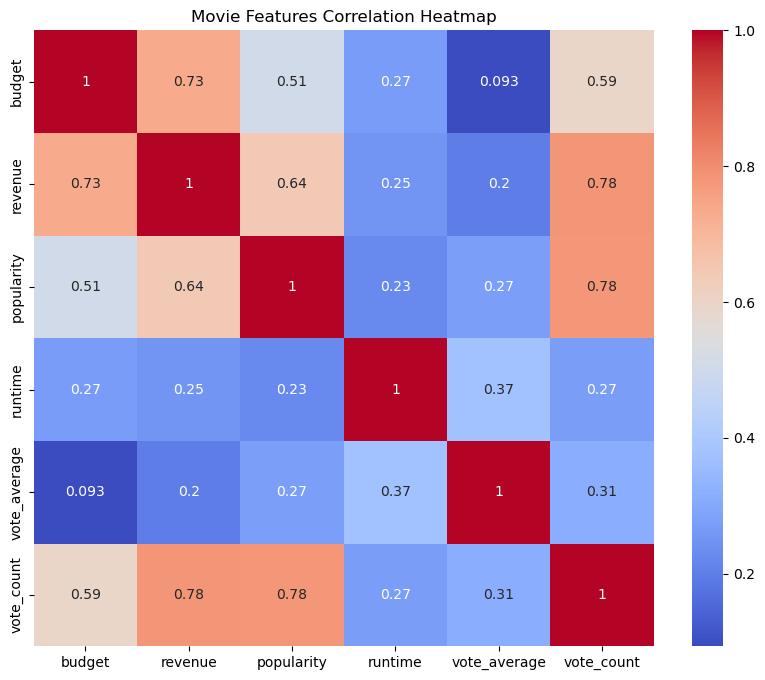

In [68]:


# Plot heatmap of feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm")
plt.title("Movie Features Correlation Heatmap")
plt.show()


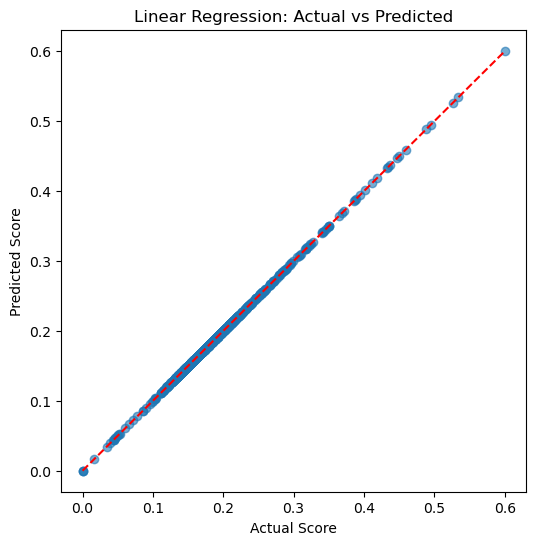

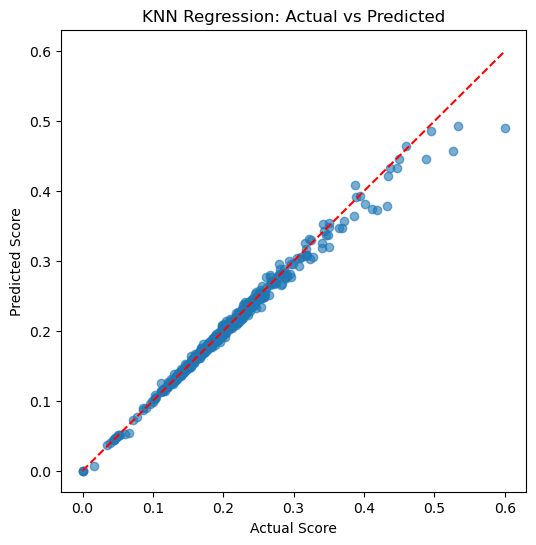

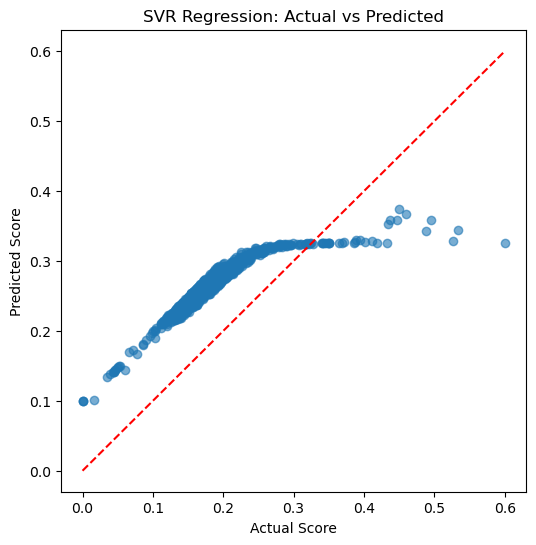

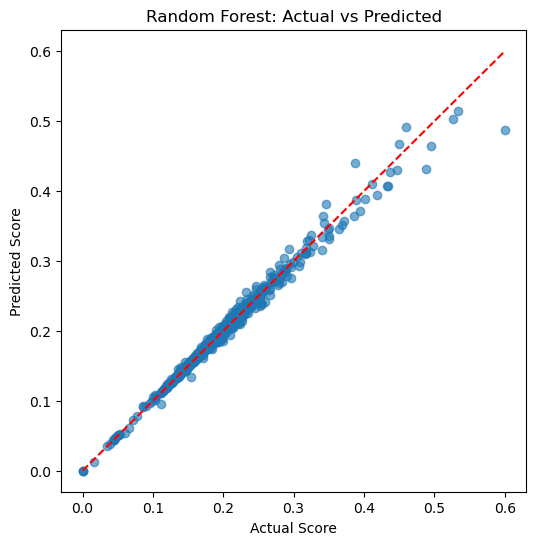

In [70]:
#  Scatter plot
for name, y_pred in models.items():
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Score")
    plt.ylabel("Predicted Score")
    plt.title(f"{name}: Actual vs Predicted")
    plt.show()


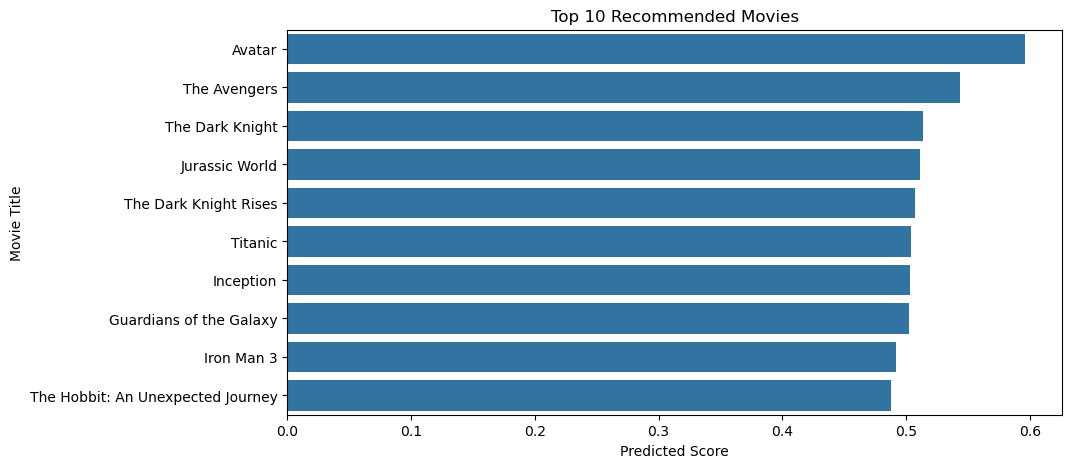

In [72]:
# Predict movie scores using Random Forest
df['Predicted_Score'] = rf.predict(X)

# Get top 10 recommended movies
top10_movies = df.sort_values('Predicted_Score', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Predicted_Score',
    y='title',
    data=top10_movies
)
plt.title("Top 10 Recommended Movies")
plt.xlabel("Predicted Score")
plt.ylabel("Movie Title")
plt.show()


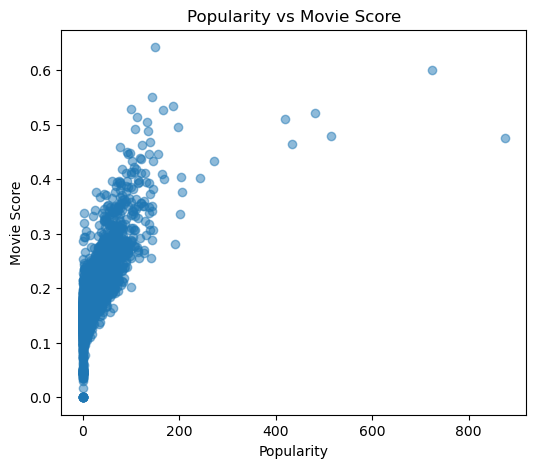

In [73]:
# scatterplot

plt.figure(figsize=(6, 5))
plt.scatter(df['popularity'], df['Score'], alpha=0.5)
plt.xlabel("Popularity")
plt.ylabel("Movie Score")
plt.title("Popularity vs Movie Score")
plt.show()


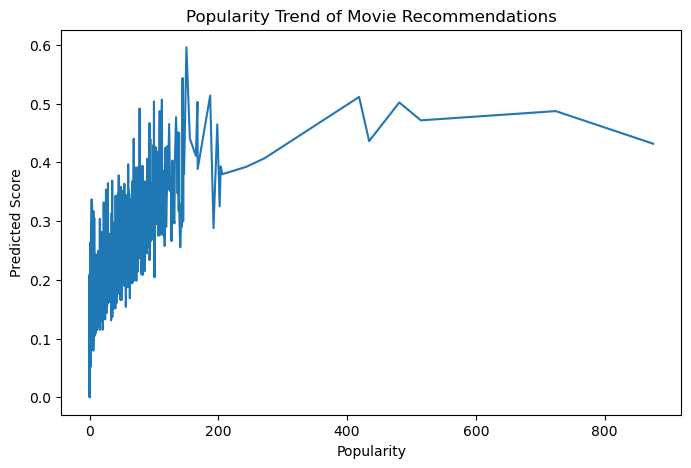

In [74]:
# Sort by popularity trend graph
sorted_df = df.sort_values('popularity')

plt.figure(figsize=(8, 5))
plt.plot(sorted_df['popularity'], sorted_df['Predicted_Score'])
plt.xlabel("Popularity")
plt.ylabel("Predicted Score")
plt.title("Popularity Trend of Movie Recommendations")
plt.show()


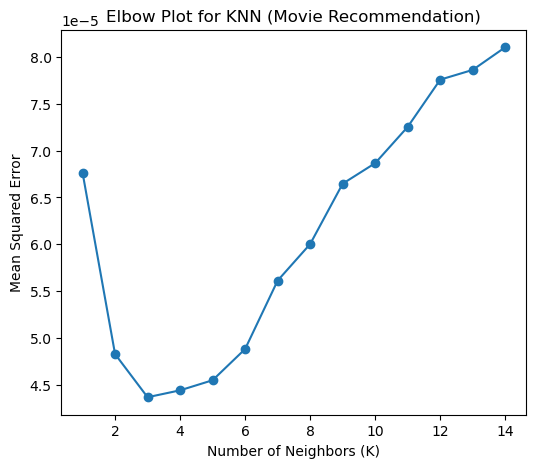

In [86]:

mse_values = []

for k in range(1, 15):
    # Scaling inside elbow loop
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    mse_values.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(6, 5))
plt.plot(range(1, 15), mse_values, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.title("Elbow Plot for KNN (Movie Recommendation)")
plt.show()


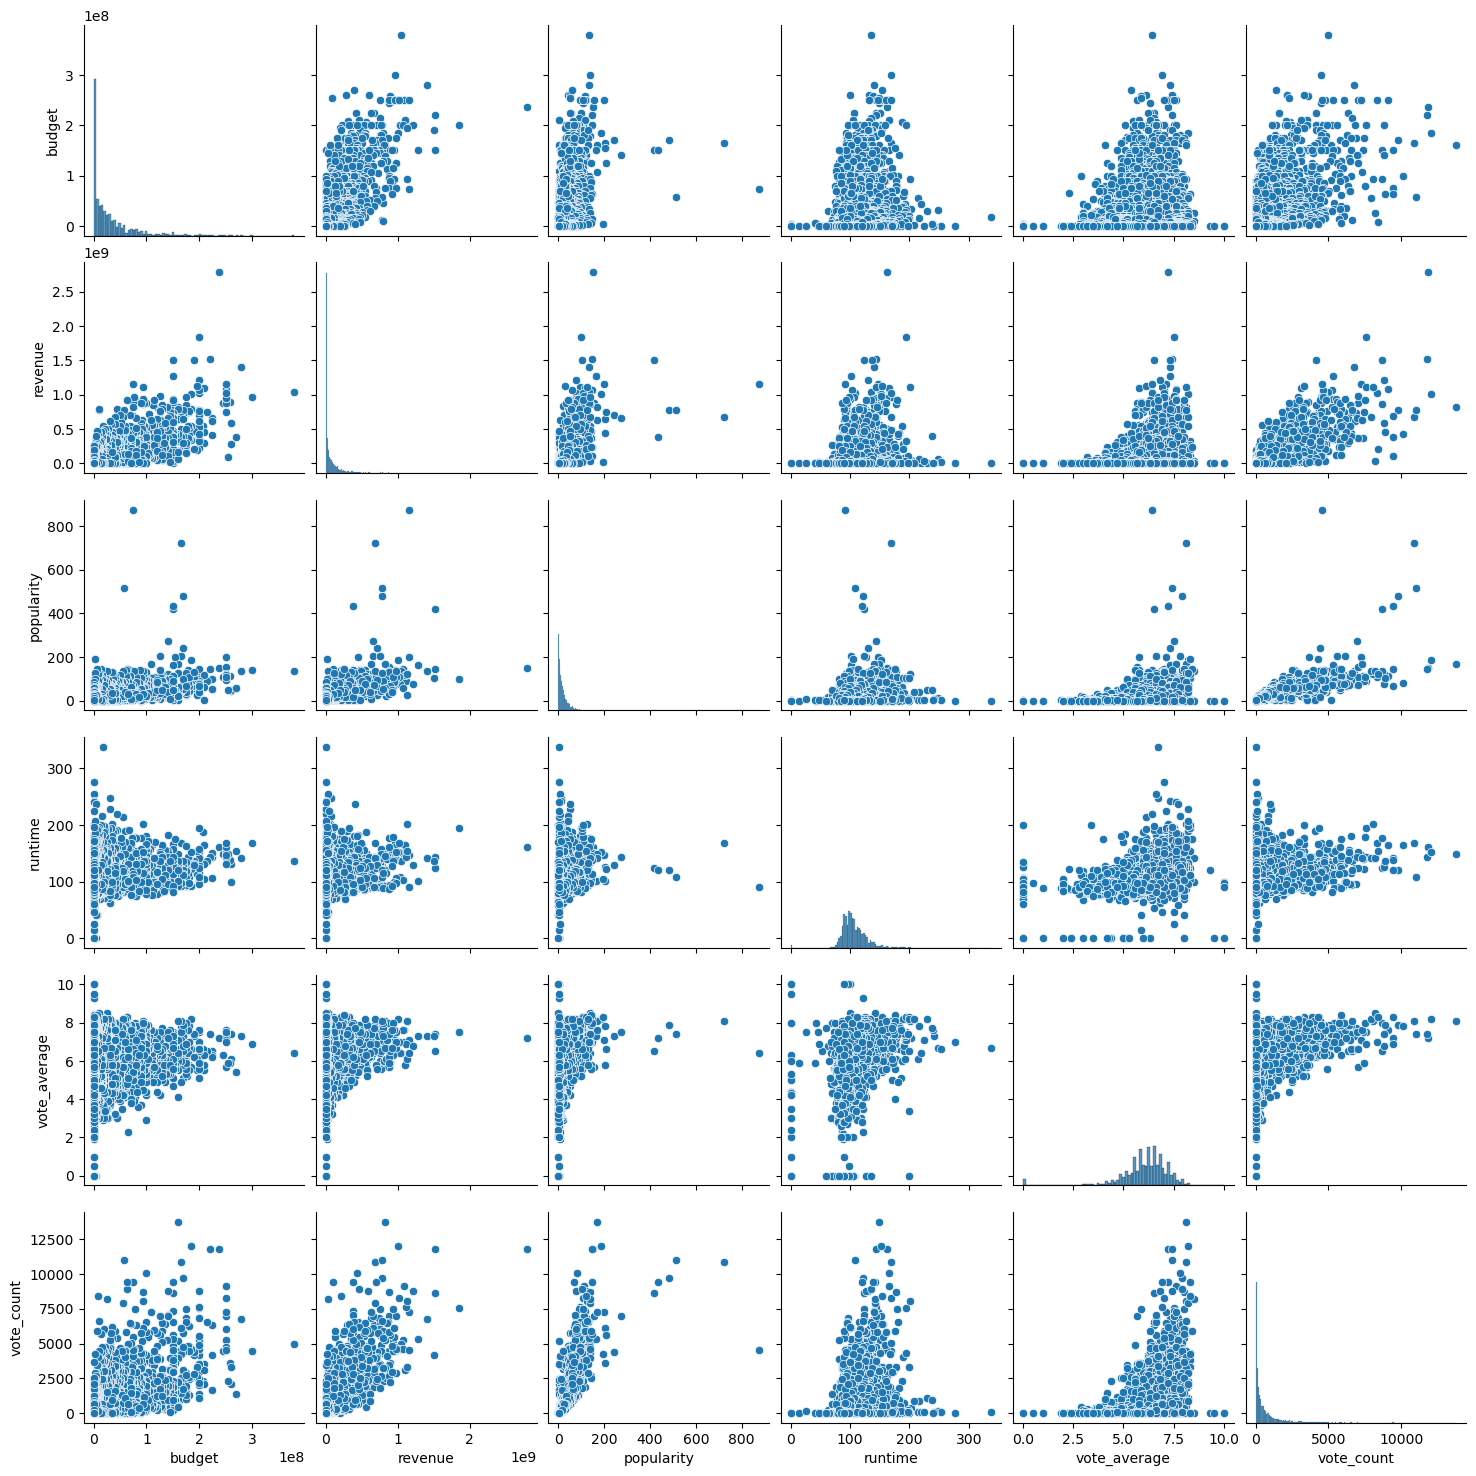

In [88]:
#  Pairplot

sns.pairplot(df[[
    'budget',
    'revenue',
    'popularity',
    'runtime',
    'vote_average',
    'vote_count'
]])
plt.show()


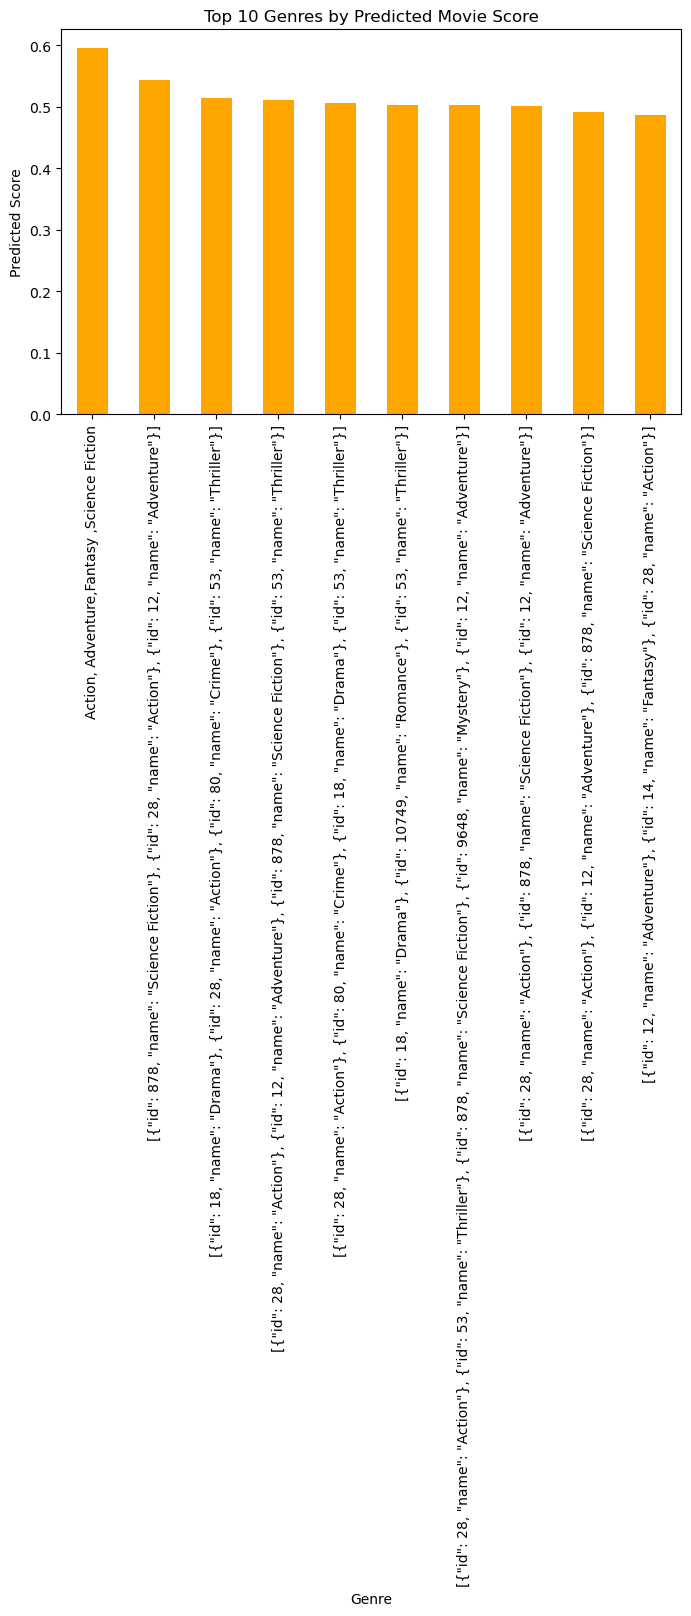

In [95]:
# Predict scores if not done already
df['Predicted_Score'] = rf.predict(X)

# Group by genre and take max predicted score
top_genres = (
    df.groupby('genres')['Predicted_Score']
    .max()  # or .mean() for average score per genre
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(8, 5))
top_genres.plot(kind='bar', color='orange')
plt.xlabel("Genre")
plt.ylabel("Predicted Score")
plt.title("Top 10 Genres by Predicted Movie Score")
plt.show()


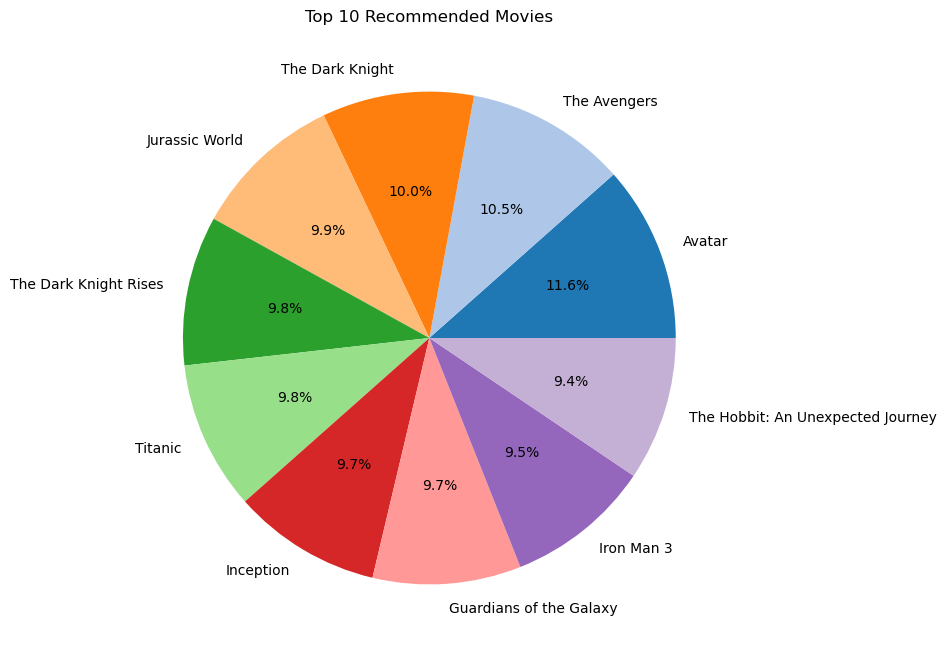

In [97]:
# Predict scores
df['Predicted_Score'] = rf.predict(X)

# top 10 movies
top10_movies = (
    df.sort_values('Predicted_Score', ascending=False)
    .head(10)
    .set_index('title')['Predicted_Score']  # replace 'title' with your movie name column
)

# Pie chart
plt.figure(figsize=(8, 8))
top10_movies.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.ylabel("")
plt.title("Top 10 Recommended Movies")
plt.show()


In [99]:
# Predict scores if not done already
df['Predicted_Score'] = rf.predict(X)

# Select top 10 movies with some info
top_10_movies = (
    df[['title', 'budget', 'popularity', 'Predicted_Score']] 
    .sort_values(by='Predicted_Score', ascending=False)
    .head(10)
)

print("\n Top 10 Recommended Movies ")
print(top_10_movies.to_string(index=False))



 Top 10 Recommended Movies 
                            title      budget  popularity  Predicted_Score
                           Avatar 237000000.0  150.437577         0.596128
                     The Avengers 220000000.0  144.448633         0.543691
                  The Dark Knight 185000000.0  187.322927         0.513908
                   Jurassic World 150000000.0  418.708552         0.511425
            The Dark Knight Rises 250000000.0  112.312950         0.506912
                          Titanic 200000000.0  100.025899         0.503639
                        Inception 160000000.0  167.583710         0.502893
          Guardians of the Galaxy 170000000.0  481.098624         0.502063
                       Iron Man 3 200000000.0   77.682080         0.491718
The Hobbit: An Unexpected Journey 250000000.0  108.849621         0.487377
